# Disaster Tweets

This notebook is used for data exploration and preprocessing of the dataset used in the Kaggle competition _"Real or Not? NLP with Disaster Tweets"_ located here: https://www.kaggle.com/c/nlp-getting-started/overview.

In [1]:
# imports

# data
import pandas as pd
import numpy as np

# plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# text preprocessing
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from bs4 import BeautifulSoup 

#helper functions
import helpers

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

/Users/davidwalkup/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Credit for the abbreviation list below, and the function that follows: _Up-to-date list of Slangs for Text Preprocessing by @nmaguette_ (https://www.kaggle.com/nmaguette/up-to-date-slangs-conversion-for-text-processing/)

These abbreviations and the accompanying function are used to translate common slang or texting/tweeting abbreviations into full words.

In [2]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [3]:
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

### Read training and test data from files.

##### First, read the training data from file and look at the first 5 rows.

In [4]:
# read training data
train_df = pd.read_csv('/Users/davidwalkup/ds-course/projects/Mod4/disaster_tweet_prediction/data/train.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


##### Look at how many rows and columns, as well as basic information about the training data.
* There are 7613 rows and 5 columns.
* There are missing values in the 'keyword' and 'location' fields.
* The 'id' and 'target' fields are integer data; the rest are string data

In [5]:
train_df.shape

(7613, 5)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


##### Now read the test data from file and look at the first 5 rows.

In [7]:
# read test data
test_df = pd.read_csv('/Users/davidwalkup/ds-course/projects/Mod4/disaster_tweet_prediction/data/test.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


##### Look at basic information for the testing data:
* There are 3263 rows and 4 columns (no 'target' column).
* There are missing values in the 'keyword' and 'location' columns.
* The 'id' column is integer data; the rest are string data.

In [8]:
test_df.shape

(3263, 4)

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


### Is the target balanced?
To see, I plotted the value counts of each target class. Class 1 accounts less than half of the observations.

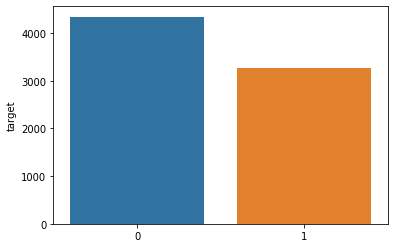

In [10]:
sns.barplot(train_df['target'].value_counts().index, train_df['target'].value_counts());

### Random sample of training and test data
To get a feel for the data, I looked at a random sample from both the training and testing data.

In [11]:
train_df.sample(5)

,id,keyword,location,text,target
1442,2078,casualty,"Trinity, Bailiwick of Jersey",@ScriptetteSar @katiecool447 btw the 30th is a...,1
7100,10173,violent%20storm,Worldwide,Violent Forces Radio: Now Playing Agony - Stor...,0
5153,7350,obliterate,Korea,@realDonaldTrump to obliterate notion &amp; pa...,0
2188,3136,debris,"Berlin, Germany",Experts leave lab as Malaysia confirms debris ...,1
2119,3045,death,Home of the Takers.,Y'all PUSSSSSSSSSY AND SHOOOK TO DEATH OF ME,0


In [12]:
test_df.sample(5)

,id,keyword,location,text
115,378,annihilation,Arizona,U.S National Park Services Tonto National Fore...
1995,6720,lava,somewhere over the rainbow,I lava you
533,1743,buildings%20burning,NaN,@chistate33 @thehill What hate crimes? It's th...
1620,5453,first%20responders,Nevada,Every time I get on the news I see more sadnes...
157,515,army,NaN,VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP ...


### Clean the training data.
Even at first glance, it's apparent this data will need a lot of processing to get it ready for modeling.

#### There are duplicated tweets, so I dropped the duplicates.
This is especially important because several of the duplicate entries were classed differently, which will interfere with model predictions.

In [13]:
train_df.loc[train_df.duplicated(subset = 'text') == True]

,id,keyword,location,text,target
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
115,165,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
119,172,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
164,238,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1
624,898,bioterrorism,NaN,To fight bioterrorism sir.,0
...,...,...,...,...,...
7600,10855,NaN,NaN,Evacuation order lifted for town of Roosevelt:...,1
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


In [14]:
train_df.drop_duplicates(subset = 'text', inplace = True)

#### Make a copy of the training data to work on.
This isn't strictly necessary. I could have worked directly on the training data instead of a copy. I thought it might be useful to retain the original data for comparison purposes, so I made a copy to do my processing on.

In [15]:
cleaned_train_df = train_df.copy()

#### First replace abbreviations in the text field.
I started by replacing the abbreviations and acronyms in the tweets with full words. This will give me more accurate term weights when I get to that step.

In [16]:
cleaned_train_df['text'] = cleaned_train_df['text'].apply(lambda x: convert_abbrev(x))

#### Clean the tweets' "text" field.
There are a lot of things in the "text" field that don't really provide any information for the purpose of predicting the purpose of the tweets.

This includes hyperlinks, HTML tags, punctuation, numbers, words that have numbers inside them, and "stop words." Stop words are words that are commonly used, but don't really provide meaning by themselves, like "the," "or," and "that."

A quick glance also reveals misspelled words. Time constraints prevented me from trying to correct spellings; I may look for a spelling checker and return to this later.

For this purpose, I wrote a function to clean the text, _"text_cleaner,"_ which can be found in the _"helpers.py"_ file.

In [17]:
cleaned_train_df['text'] = cleaned_train_df['text'].apply(lambda x: helpers.text_cleaner(x))

#### Next, replace missing keyword entries.
I didn't replace the missing "location" entries because the cardinality was very high, which lead me to discard location as a feature.

In [18]:
no_keyword = cleaned_train_df.loc[cleaned_train_df['keyword'].isna() == True].index
cleaned_train_df['keyword'].loc[no_keyword] = 'no_keyword'

#### Now clean the keyword field.
Once the missing entries were replaced with 'no_keyword,' the entries were cleaned up.

In [19]:
cleaned_train_df['keyword'] = cleaned_train_df['keyword'].apply(lambda x: helpers.text_cleaner(x))

In [20]:
cleaned_train_df.sample(5)

,id,keyword,location,text,target
6450,9226,suicide bombing,Australia,erdogans bloody gambit on july a suicide bombi...,1
2331,3355,demolition,USA,epa begins demolition of homes in toxic area b...,1
5810,8292,rubble,"Columbus, Georgia",refuse to let my life be reduced to rubble whe...,0
1228,1769,buildings burning,"Washington, D.C.",watching xela firefighters struggle to save bu...,1
1853,2664,crush,NaN,ina buted girl crush,1


#### Drop the 'Location' column.
Because there are so many unique values, as mentioned earlier, I chose not to use the 'location' column. I dropped it from the DataFrame.

In [21]:
cleaned_train_df.drop(columns = 'location', inplace = True)

#### Before saving to file, check for empty values in the text field.
It's possible, after cleaning, that some 'text' fields are empty, so I checked for that.

In [22]:
cleaned_train_df.loc[(cleaned_train_df['text'].isna()==True) | (cleaned_train_df['text'] == '')]

,id,keyword,text,target
5115,7295,nuclear reactor,,0


There is only one. There isn't any other useful information in that tweet, so I chose to drop it.

In [23]:
cleaned_train_df.drop(index = 5115, inplace = True)

In [24]:
cleaned_train_df.loc[(cleaned_train_df['text'].isna()==True) | (cleaned_train_df['text'] == '')]

,id,keyword,text,target


In [25]:
cleaned_train_df.to_csv(path_or_buf = '/Users/davidwalkup/ds-course/projects/Mod4/disaster_tweet_prediction/data/cleaned_train.csv',
                        index = False)

### Stemmed copy of the cleaned training data.

In [26]:
stemmed_train_df = cleaned_train_df.copy()

In [27]:
stemmed_train_df['text'] = stemmed_train_df['text'].apply(lambda x: helpers.text_normalize(x, stem_it = True))

In [28]:
stemmed_train_df.sample(5)

,id,keyword,text,target
5899,8425,sandstorm,two hour of sandstorm remix all merg togeth no...,0
4722,6714,lava,contempl go to chili just to get a molten lava...,0
4770,6788,lightning,world war ii book lightn joe an autobiographi ...,1
6071,8673,sinkhole,damn that sinkhol on sunset,1
614,885,bioterrorism,if collud take wht f auth make her look blk wb...,1


In [29]:
stemmed_train_df.to_csv('/Users/davidwalkup/ds-course/projects/Mod4/disaster_tweet_prediction/data/stemmed_train.csv',
                        index = False)

### Lemmatized copy of the cleaned training data.

In [30]:
lemmatized_train_df = cleaned_train_df.copy()

In [31]:
lemmatized_train_df['text'] = lemmatized_train_df['text'].apply(lambda x: helpers.text_normalize(x, lemmatize_it = True))

In [32]:
lemmatized_train_df.sample(5)

,id,keyword,text,target
6485,9272,sunk,im getting a car wow it hasnt sunk in,0
5596,7984,razed,at least you were sincere,1
3136,4507,emergency,survival kit whistle fire starter wire saw cre...,0
4995,7126,military,were hiring read about our latest job opening ...,0
4958,7068,meltdown,omg i remember the meltdown the day i did her ...,0


In [33]:
lemmatized_train_df.to_csv('/Users/davidwalkup/ds-course/projects/Mod4/disaster_tweet_prediction/data/lemmatized_train.csv',
                           index = False)

### Clean the test data.

Perform same cleaning steps on test data as were performed on the training data (except removing any records).

In [34]:
cleaned_test_df = test_df.copy()

In [35]:
cleaned_test_df['text'] = cleaned_test_df['text'].apply(lambda x: convert_abbrev(x))

In [36]:
cleaned_test_df['text'] = cleaned_test_df['text'].apply(lambda x: helpers.text_cleaner(x))

In [37]:
no_keyword = cleaned_test_df.loc[cleaned_test_df['keyword'].isna() == True].index
cleaned_test_df['keyword'].loc[no_keyword] = 'no_keyword'

In [39]:
cleaned_test_df['keyword'] = cleaned_test_df['keyword'].apply(lambda x: helpers.text_cleaner(x))

In [ ]:
cleaned_test_df.drop(columns = 'location', inplace = True)

My models performed best on the lemmatized training data, so I lemmatize the test data.

In [41]:
cleaned_test_df['text'] = cleaned_test_df['text'].apply(lambda x: helpers.text_normalize(x, lemmatize_it = True))

In [42]:
cleaned_test_df.sample(5)

,id,keyword,location,text
2428,8115,rescued,niger state,three suspect in police net for kidnapping tra...
2340,7820,quarantine,,quarantine enforced isolation to prevent conta...
2985,9871,traumatised,nolocation,im so traumatised
2195,7347,obliterate,usa,watch sarah palin obliterate planned parenthoo...
132,417,apocalypse,nolocation,apocalypse no why artist should not go into th...


In [43]:
cleaned_test_df.loc[(cleaned_test_df['text'].isna()==True) | (cleaned_test_df['text'] == '')]

,id,keyword,location,text


In [44]:
cleaned_test_df.head()

,id,keyword,location,text
0,0,nokeyword,nolocation,just happened a terrible car crash
1,2,nokeyword,nolocation,heard about earthquake is different city stay ...
2,3,nokeyword,nolocation,there is a forest fire at spot pond goose are ...
3,9,nokeyword,nolocation,apocalypse lighting spokane wildfire
4,11,nokeyword,nolocation,typhoon soudelor kill in china and taiwan


In [45]:
cleaned_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3263 non-null   object
 2   location  3263 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [46]:
cleaned_test_df.to_csv('/Users/davidwalkup/ds-course/projects/Mod4/disaster_tweet_prediction/data/cleaned_test.csv',
                       index = False)